# Evaluation of different context representation schemes for conditional neural processes

## Conditional Neural Processes : Multivariate polynomial regression.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Checking if we are using google colab or local machine and configuring 
# imports accordingly
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP
from cnp.run_experiment import run_experiment

import torch
import numpy as np
from copy import copy

# import utils
import json
from datetime import date

Running on Colab?
yes
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
if google_colab=='yes':
    config_dir = 'base_configs'
else:
    config_dir = os.path.join(BASE_DIR,'base_configs')

# checkin the parameters
# loading the base config file for this experiment
with open(os.path.join(config_dir,'polynomial_regression_config.json')) as f:
    file = f.read()
    base_config = json.loads(file)
base_config

{'cnp_params': {'aggregation_kwargs': {'aggregation_operation': 'mean',
   'aggregator': 'SimpleAggregator'},
  'batch_norm': True,
  'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0.2,
  'max_contx': 130,
  'max_funcs': 130,
  'min_contx': 40,
  'min_funcs': 80,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.PolynomialRegression',
  'init_kwargs': {'range_x': [-2, 2], 'steps': 400, 'xdim': 1},
  'max_coef': 1,
  'min_coef': -1,
  'mu_gen': 0,
  'mu_noise': 0,
  'num_instances_test': 100,
  'num_instances_train': 64,
  'num_instances_vali': 10,
  'sigma_gen': 1,
  'sigma_noise': 0.04},
 'experiment_params': {'lr': 0.0001,
  'n_epochs': 200000,
  'seed': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_test': 10,
  'batch_size_train': 64,
  'batch_size_vali': 10,
  'plot_mode': None,
  'plot_progress': True,
  'print_after': 2000}}

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    base_config['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    base_config['experiment_params']['train_on_gpu'] = False

Training on GPU!


In [5]:
base_config['cnp_params']['dimx'] = 3
base_config['data_kwargs']['init_kwargs']['xdim'] = 3
# setting specfic training parameters
base_config ['train_kwargs']['print_after'] = int(input('Validation run after how many epochs ?'))
base_config ['train_kwargs']['early_stopping'] = bool(input('Add early stopping?'))


Validation run after how many epochs ?1000
Add early stopping?True


## Simple Mean Experiment 

In [6]:
mean_exp_config = copy(base_config)

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=131, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.2, inplace=False)
    (10): Linear(in_features=128, out_features=128, bias=True)
  )
)


  0%|          | 9/200000 [00:00<21:40:48,  2.56it/s]

Mean training loss at epoch 0 :                         12.582
Mean Validation loss after 0 equals                     18.362

Early stopping criterion not met


  1%|          | 1013/200000 [00:13<44:05, 75.23it/s]

Mean training loss at epoch 1000 :                         2.144
Mean Validation loss after 1000 equals                     2.146

Early stopping criterion not met


  1%|          | 2010/200000 [00:26<43:35, 75.69it/s]

Mean training loss at epoch 2000 :                         1.726
Mean Validation loss after 2000 equals                     1.401

Early stopping criterion not met


  2%|▏         | 3009/200000 [00:39<43:30, 75.47it/s]

Mean training loss at epoch 3000 :                         1.541
Mean Validation loss after 3000 equals                     1.352

Early stopping criterion not met


  2%|▏         | 4016/200000 [00:52<42:23, 77.04it/s]

Mean training loss at epoch 4000 :                         1.562
Mean Validation loss after 4000 equals                     1.369

Early stopping criterion not met


  3%|▎         | 5009/200000 [01:05<42:33, 76.37it/s]

Mean training loss at epoch 5000 :                         1.433
Mean Validation loss after 5000 equals                     1.264

Early stopping criterion not met


  3%|▎         | 6011/200000 [01:18<41:48, 77.34it/s]

Mean training loss at epoch 6000 :                         1.406
Mean Validation loss after 6000 equals                     1.239

Early stopping criterion not met


  4%|▎         | 7012/200000 [01:31<41:44, 77.04it/s]

Mean training loss at epoch 7000 :                         1.392
Mean Validation loss after 7000 equals                     1.227

Early stopping criterion not met


  4%|▍         | 8014/200000 [01:44<42:28, 75.32it/s]

Mean training loss at epoch 8000 :                         1.453
Mean Validation loss after 8000 equals                     1.154

Early stopping criterion not met


  5%|▍         | 9013/200000 [01:57<42:36, 74.69it/s]

Mean training loss at epoch 9000 :                         1.41
Mean Validation loss after 9000 equals                     1.089

Early stopping criterion not met


  5%|▌         | 10012/200000 [02:10<41:47, 75.76it/s]

Mean training loss at epoch 10000 :                         1.476
Mean Validation loss after 10000 equals                     1.158

Early stopping criterion not met


  6%|▌         | 11013/200000 [02:23<40:24, 77.96it/s]

Mean training loss at epoch 11000 :                         1.248
Mean Validation loss after 11000 equals                     1.13

Early stopping criterion not met


  6%|▌         | 12015/200000 [02:36<41:26, 75.62it/s]

Mean training loss at epoch 12000 :                         1.316
Mean Validation loss after 12000 equals                     1.016

Early stopping criterion not met


  7%|▋         | 13013/200000 [02:49<42:06, 74.00it/s]

Mean training loss at epoch 13000 :                         1.27
Mean Validation loss after 13000 equals                     1.073

Early stopping criterion not met


  7%|▋         | 14012/200000 [03:02<40:34, 76.38it/s]

Mean training loss at epoch 14000 :                         1.244
Mean Validation loss after 14000 equals                     1.044

Early stopping criterion not met


  8%|▊         | 15012/200000 [03:15<40:15, 76.60it/s]

Mean training loss at epoch 15000 :                         1.218
Mean Validation loss after 15000 equals                     0.927

Early stopping criterion not met


  8%|▊         | 16012/200000 [03:28<39:56, 76.78it/s]

Mean training loss at epoch 16000 :                         1.191
Mean Validation loss after 16000 equals                     1.013

Early stopping criterion not met


  9%|▊         | 17014/200000 [03:41<40:16, 75.72it/s]

Mean training loss at epoch 17000 :                         1.219
Mean Validation loss after 17000 equals                     1.041

Early stopping criterion not met


  9%|▉         | 18013/200000 [03:54<39:37, 76.55it/s]

Mean training loss at epoch 18000 :                         1.173
Mean Validation loss after 18000 equals                     1.091

Early stopping criterion not met


 10%|▉         | 19012/200000 [04:07<40:47, 73.93it/s]

Mean training loss at epoch 19000 :                         1.209
Mean Validation loss after 19000 equals                     0.928

Early stopping criterion not met


 10%|█         | 20009/200000 [04:20<40:18, 74.42it/s]

Mean training loss at epoch 20000 :                         1.105
Mean Validation loss after 20000 equals                     1.066

Early stopping criterion not met


 11%|█         | 21010/200000 [04:34<38:46, 76.95it/s]

Mean training loss at epoch 21000 :                         1.134
Mean Validation loss after 21000 equals                     1.007

Early stopping criterion not met


 11%|█         | 22016/200000 [04:47<39:08, 75.79it/s]

Mean training loss at epoch 22000 :                         1.233
Mean Validation loss after 22000 equals                     0.911

Early stopping criterion not met


 12%|█▏        | 23015/200000 [05:00<38:36, 76.40it/s]

Mean training loss at epoch 23000 :                         1.213
Mean Validation loss after 23000 equals                     1.006

Early stopping criterion not met


 12%|█▏        | 24010/200000 [05:13<38:02, 77.12it/s]

Mean training loss at epoch 24000 :                         1.147
Mean Validation loss after 24000 equals                     1.029

Early stopping criterion not met


 13%|█▎        | 25010/200000 [05:26<39:31, 73.79it/s]

Mean training loss at epoch 25000 :                         1.306
Mean Validation loss after 25000 equals                     0.886

Early stopping criterion not met


 13%|█▎        | 26010/200000 [05:40<39:07, 74.10it/s]

Mean training loss at epoch 26000 :                         1.055
Mean Validation loss after 26000 equals                     0.978

Early stopping criterion not met


 14%|█▎        | 27011/200000 [05:53<37:49, 76.21it/s]

Mean training loss at epoch 27000 :                         1.475
Mean Validation loss after 27000 equals                     1.091

Early stopping criterion not met


 14%|█▍        | 28009/200000 [06:06<38:28, 74.49it/s]

Mean training loss at epoch 28000 :                         1.181
Mean Validation loss after 28000 equals                     1.038

Early stopping criterion not met


 15%|█▍        | 29014/200000 [06:19<39:10, 72.74it/s]

Mean training loss at epoch 29000 :                         1.075
Mean Validation loss after 29000 equals                     0.891

Early stopping criterion not met


 15%|█▌        | 30009/200000 [06:33<37:33, 75.44it/s]

Mean training loss at epoch 30000 :                         1.051
Mean Validation loss after 30000 equals                     0.916

Early stopping criterion not met


 16%|█▌        | 31011/200000 [06:46<36:58, 76.16it/s]

Mean training loss at epoch 31000 :                         1.036
Mean Validation loss after 31000 equals                     0.986

Early stopping criterion not met


 16%|█▌        | 32015/200000 [06:59<38:05, 73.51it/s]

Mean training loss at epoch 32000 :                         1.045
Mean Validation loss after 32000 equals                     0.951

Early stopping criterion not met


 17%|█▋        | 33014/200000 [07:13<36:23, 76.46it/s]

Mean training loss at epoch 33000 :                         1.163
Mean Validation loss after 33000 equals                     0.878

Early stopping criterion not met


 17%|█▋        | 34009/200000 [07:26<37:10, 74.43it/s]

Mean training loss at epoch 34000 :                         1.093
Mean Validation loss after 34000 equals                     0.889

Early stopping criterion not met


 18%|█▊        | 35014/200000 [07:39<37:21, 73.59it/s]

Mean training loss at epoch 35000 :                         1.156
Mean Validation loss after 35000 equals                     0.947

Early stopping criterion not met


 18%|█▊        | 36011/200000 [07:52<36:31, 74.81it/s]

Mean training loss at epoch 36000 :                         1.072
Mean Validation loss after 36000 equals                     1.066

Early stopping criterion not met


 19%|█▊        | 37015/200000 [08:06<35:42, 76.06it/s]

Mean training loss at epoch 37000 :                         1.074
Mean Validation loss after 37000 equals                     0.987

Early stopping criterion not met


 19%|█▉        | 38008/200000 [08:19<37:08, 72.70it/s]

Mean training loss at epoch 38000 :                         1.012
Mean Validation loss after 38000 equals                     0.973

Early stopping criterion not met


 20%|█▉        | 39016/200000 [08:32<35:12, 76.21it/s]

Mean training loss at epoch 39000 :                         1.178
Mean Validation loss after 39000 equals                     0.971

Early stopping criterion not met


 20%|██        | 40009/200000 [08:46<35:16, 75.60it/s]

Mean training loss at epoch 40000 :                         1.11
Mean Validation loss after 40000 equals                     0.961

Early stopping criterion not met


 21%|██        | 41009/200000 [08:59<35:17, 75.07it/s]

Mean training loss at epoch 41000 :                         1.002
Mean Validation loss after 41000 equals                     0.912

Early stopping criterion not met


 21%|██        | 42014/200000 [09:12<35:41, 73.78it/s]

Mean training loss at epoch 42000 :                         1.017
Mean Validation loss after 42000 equals                     0.985

Early stopping criterion not met


 22%|██▏       | 43010/200000 [09:26<35:00, 74.73it/s]

Mean training loss at epoch 43000 :                         1.01
Mean Validation loss after 43000 equals                     0.983

Early stopping criterion not met


 22%|██▏       | 44013/200000 [09:39<34:40, 74.98it/s]

Mean training loss at epoch 44000 :                         1.126
Mean Validation loss after 44000 equals                     0.965

Early stopping criterion not met


 23%|██▎       | 45013/200000 [09:53<34:49, 74.17it/s]

Mean training loss at epoch 45000 :                         1.017
Mean Validation loss after 45000 equals                     1.051

Early stopping criterion not met


 23%|██▎       | 46015/200000 [10:06<34:25, 74.55it/s]

Mean training loss at epoch 46000 :                         1.084
Mean Validation loss after 46000 equals                     0.895

Early stopping criterion not met


 24%|██▎       | 47008/200000 [10:19<34:13, 74.51it/s]

Mean training loss at epoch 47000 :                         1.214
Mean Validation loss after 47000 equals                     1.117

Early stopping criterion not met


 24%|██▍       | 48009/200000 [10:33<34:14, 73.99it/s]

Mean training loss at epoch 48000 :                         1.002
Mean Validation loss after 48000 equals                     0.965

Early stopping criterion not met


 25%|██▍       | 49011/200000 [10:46<33:48, 74.43it/s]

Mean training loss at epoch 49000 :                         1.128
Mean Validation loss after 49000 equals                     0.959

Early stopping criterion not met


 25%|██▌       | 50011/200000 [10:59<33:15, 75.18it/s]

Mean training loss at epoch 50000 :                         1.125
Mean Validation loss after 50000 equals                     0.916

Early stopping criterion not met


 26%|██▌       | 51011/200000 [11:13<32:47, 75.74it/s]

Mean training loss at epoch 51000 :                         1.297
Mean Validation loss after 51000 equals                     0.822

Early stopping criterion not met


 26%|██▌       | 52013/200000 [11:26<33:05, 74.53it/s]

Mean training loss at epoch 52000 :                         1.062
Mean Validation loss after 52000 equals                     1.081

Early stopping criterion not met


 27%|██▋       | 53014/200000 [11:39<32:18, 75.82it/s]

Mean training loss at epoch 53000 :                         1.047
Mean Validation loss after 53000 equals                     1.236

Early stopping criterion not met


 27%|██▋       | 54015/200000 [11:53<32:24, 75.08it/s]

Mean training loss at epoch 54000 :                         0.993
Mean Validation loss after 54000 equals                     1.172

Early stopping criterion not met


 28%|██▊       | 55008/200000 [12:06<32:34, 74.18it/s]

Mean training loss at epoch 55000 :                         1.009
Mean Validation loss after 55000 equals                     1.015

Early stopping criterion not met


 28%|██▊       | 56008/200000 [12:20<33:39, 71.31it/s]

Mean training loss at epoch 56000 :                         1.125
Mean Validation loss after 56000 equals                     0.815

Early stopping criterion not met


 29%|██▊       | 57010/200000 [12:33<31:33, 75.52it/s]

Mean training loss at epoch 57000 :                         0.963
Mean Validation loss after 57000 equals                     0.942

Early stopping criterion not met


 29%|██▉       | 58010/200000 [12:47<31:43, 74.59it/s]

Mean training loss at epoch 58000 :                         0.969
Mean Validation loss after 58000 equals                     1.05

Early stopping criterion not met


 30%|██▉       | 59011/200000 [13:00<31:09, 75.42it/s]

Mean training loss at epoch 59000 :                         0.999
Mean Validation loss after 59000 equals                     0.969

Early stopping criterion not met


 30%|███       | 60014/200000 [13:13<31:31, 74.01it/s]

Mean training loss at epoch 60000 :                         1.011
Mean Validation loss after 60000 equals                     1.015

Early stopping criterion not met


 31%|███       | 61009/200000 [13:26<30:55, 74.90it/s]

Mean training loss at epoch 61000 :                         0.962
Mean Validation loss after 61000 equals                     0.935

Early stopping criterion not met


 31%|███       | 62011/200000 [13:40<31:21, 73.35it/s]

Mean training loss at epoch 62000 :                         1.04
Mean Validation loss after 62000 equals                     1.023

Early stopping criterion not met


 32%|███▏      | 63011/200000 [13:53<30:48, 74.12it/s]

Mean training loss at epoch 63000 :                         0.977
Mean Validation loss after 63000 equals                     1.019

Early stopping criterion not met


 32%|███▏      | 64014/200000 [14:07<30:07, 75.22it/s]

Mean training loss at epoch 64000 :                         1.154
Mean Validation loss after 64000 equals                     0.883

Early stopping criterion not met


 33%|███▎      | 65008/200000 [14:20<29:43, 75.70it/s]

Mean training loss at epoch 65000 :                         1.057
Mean Validation loss after 65000 equals                     0.917

Early stopping criterion not met


 33%|███▎      | 66008/200000 [14:33<30:59, 72.07it/s]

Mean training loss at epoch 66000 :                         0.99
Mean Validation loss after 66000 equals                     1.037

Early stopping criterion not met


 34%|███▎      | 67010/200000 [14:47<29:47, 74.40it/s]

Mean training loss at epoch 67000 :                         1.047
Mean Validation loss after 67000 equals                     1.104

Early stopping criterion not met


 34%|███▍      | 68010/200000 [15:00<30:51, 71.30it/s]

Mean training loss at epoch 68000 :                         1.145
Mean Validation loss after 68000 equals                     1.101

Early stopping criterion not met


 35%|███▍      | 69010/200000 [15:14<29:47, 73.28it/s]

Mean training loss at epoch 69000 :                         1.008
Mean Validation loss after 69000 equals                     0.842

Early stopping criterion not met


 35%|███▌      | 70011/200000 [15:27<29:03, 74.57it/s]

Mean training loss at epoch 70000 :                         1.216
Mean Validation loss after 70000 equals                     0.96

Early stopping criterion not met


 36%|███▌      | 71013/200000 [15:40<29:02, 74.02it/s]

Mean training loss at epoch 71000 :                         0.95
Mean Validation loss after 71000 equals                     1.131

Early stopping criterion not met


 36%|███▌      | 72016/200000 [15:54<28:10, 75.72it/s]

Mean training loss at epoch 72000 :                         1.04
Mean Validation loss after 72000 equals                     1.092

Early stopping criterion not met


 37%|███▋      | 73009/200000 [16:07<28:07, 75.26it/s]

Mean training loss at epoch 73000 :                         0.92
Mean Validation loss after 73000 equals                     1.076

Early stopping criterion not met


 37%|███▋      | 74010/200000 [16:20<28:12, 74.44it/s]

Mean training loss at epoch 74000 :                         0.936
Mean Validation loss after 74000 equals                     1.066

Early stopping criterion not met


 38%|███▊      | 75010/200000 [16:34<27:52, 74.71it/s]

Mean training loss at epoch 75000 :                         0.981
Mean Validation loss after 75000 equals                     1.036

Early stopping criterion not met


 38%|███▊      | 76013/200000 [16:47<27:58, 73.87it/s]

Mean training loss at epoch 76000 :                         1.045
Mean Validation loss after 76000 equals                     0.836

Early stopping criterion not met


 39%|███▊      | 77014/200000 [17:01<27:49, 73.67it/s]

Mean training loss at epoch 77000 :                         1.043
Mean Validation loss after 77000 equals                     1.271

Early stopping criterion not met


 39%|███▉      | 78007/200000 [17:14<28:12, 72.09it/s]

Mean training loss at epoch 78000 :                         1.036
Mean Validation loss after 78000 equals                     0.987

Early stopping criterion not met


 40%|███▉      | 79014/200000 [17:27<28:17, 71.26it/s]

Mean training loss at epoch 79000 :                         1.092
Mean Validation loss after 79000 equals                     1.023

Early stopping criterion not met


 40%|████      | 80014/200000 [17:41<27:16, 73.33it/s]

Mean training loss at epoch 80000 :                         1.01
Mean Validation loss after 80000 equals                     1.13

Early stopping criterion not met


 41%|████      | 81014/200000 [17:55<27:01, 73.37it/s]

Mean training loss at epoch 81000 :                         0.973
Mean Validation loss after 81000 equals                     0.868

Early stopping criterion not met


 41%|████      | 82014/200000 [18:08<26:56, 73.01it/s]

Mean training loss at epoch 82000 :                         1.149
Mean Validation loss after 82000 equals                     0.859

Early stopping criterion not met


 42%|████▏     | 83014/200000 [18:21<26:10, 74.50it/s]

Mean training loss at epoch 83000 :                         0.962
Mean Validation loss after 83000 equals                     1.0

Early stopping criterion not met


 42%|████▏     | 84014/200000 [18:35<25:46, 75.01it/s]

Mean training loss at epoch 84000 :                         0.991
Mean Validation loss after 84000 equals                     1.038

Early stopping criterion not met


 43%|████▎     | 85014/200000 [18:48<26:08, 73.29it/s]

Mean training loss at epoch 85000 :                         1.033
Mean Validation loss after 85000 equals                     1.094

Early stopping criterion not met


 43%|████▎     | 86015/200000 [19:02<25:14, 75.26it/s]

Mean training loss at epoch 86000 :                         1.192
Mean Validation loss after 86000 equals                     1.013

Early stopping criterion not met


 44%|████▎     | 87016/200000 [19:15<25:06, 75.02it/s]

Mean training loss at epoch 87000 :                         1.183
Mean Validation loss after 87000 equals                     1.045

Early stopping criterion not met


 44%|████▍     | 88008/200000 [19:28<25:25, 73.41it/s]

Mean training loss at epoch 88000 :                         1.151
Mean Validation loss after 88000 equals                     0.983

Early stopping criterion not met


 45%|████▍     | 89009/200000 [19:42<25:28, 72.61it/s]

Mean training loss at epoch 89000 :                         1.103
Mean Validation loss after 89000 equals                     0.967

Early stopping criterion not met


 45%|████▌     | 90010/200000 [19:55<24:33, 74.64it/s]

Mean training loss at epoch 90000 :                         1.096
Mean Validation loss after 90000 equals                     1.08

Early stopping criterion not met


 46%|████▌     | 91010/200000 [20:09<23:47, 76.35it/s]

Mean training loss at epoch 91000 :                         1.068
Mean Validation loss after 91000 equals                     1.131

Early stopping criterion not met


 46%|████▌     | 92011/200000 [20:22<23:34, 76.33it/s]

Mean training loss at epoch 92000 :                         0.993
Mean Validation loss after 92000 equals                     1.142

Early stopping criterion not met


 46%|████▋     | 92996/200000 [20:35<23:35, 75.58it/s]

Mean training loss at epoch 93000 :                         0.925
Mean Validation loss after 93000 equals                     1.191

Early stopping criterion meet for loss


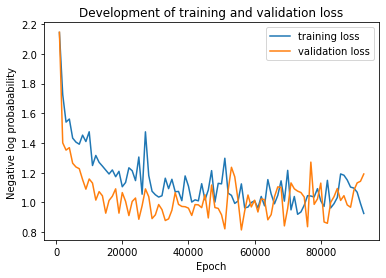

seed is set
The mean squared error for this experiment is 0.7443188548088073
Creating new directory at experiments/results/3d_polynomial_65ctxt_mean_early_stop_2020_07_08_16_58
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config_file
Saving snapshot of the sytems


In [7]:
run_experiment(config_file=mean_exp_config,
               experiment_name='3d_polynomial_65ctxt_mean_early_stop',
              google_colab=google_colab)

## Max Experiment 

In [ ]:
max_exp_config = copy(base_config)
max_exp_config['cnp_params']['aggregation_kwargs']['aggregation_operation']='max'

run_experiment(config_file=max_exp_config,
               experiment_name='3d_polynomial_65ctxt_max_early_stop',
              google_colab=google_colab)


  0%|          | 6/200000 [00:00<55:43, 59.82it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=131, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.2, inplace=False)
    (10): Linear(in_features=128, out_features=128, bias=True)
  )
)
Mea


  1%|          | 1015/200000 [00:13<46:06, 71.93it/s]

Mean training loss at epoch 1000 :                         2.197
Mean Validation loss after 1000 equals                     2.22

Early stopping criterion not met



  1%|          | 2009/200000 [00:26<44:39, 73.89it/s]

Mean training loss at epoch 2000 :                         1.524
Mean Validation loss after 2000 equals                     1.441

Early stopping criterion not met



  2%|▏         | 3009/200000 [00:40<44:27, 73.85it/s]

Mean training loss at epoch 3000 :                         1.496
Mean Validation loss after 3000 equals                     1.239

Early stopping criterion not met



  2%|▏         | 4011/200000 [00:53<43:44, 74.67it/s]

Mean training loss at epoch 4000 :                         1.432
Mean Validation loss after 4000 equals                     1.236

Early stopping criterion not met



  3%|▎         | 5011/200000 [01:06<44:09, 73.60it/s]

Mean training loss at epoch 5000 :                         1.303
Mean Validation loss after 5000 equals                     1.127

Early stopping criterion not met



  3%|▎         | 6013/200000 [01:20<43:56, 73.59it/s]

Mean training loss at epoch 6000 :                         1.271
Mean Validation loss after 6000 equals                     0.97

Early stopping criterion not met



  4%|▎         | 7013/200000 [01:33<43:11, 74.46it/s]

Mean training loss at epoch 7000 :                         1.189
Mean Validation loss after 7000 equals                     1.041

Early stopping criterion not met



  4%|▍         | 8014/200000 [01:47<42:47, 74.78it/s]

Mean training loss at epoch 8000 :                         1.165
Mean Validation loss after 8000 equals                     0.86

Early stopping criterion not met



  5%|▍         | 9015/200000 [02:00<42:23, 75.10it/s]

Mean training loss at epoch 9000 :                         1.206
Mean Validation loss after 9000 equals                     0.853

Early stopping criterion not met



  5%|▌         | 10011/200000 [02:13<42:50, 73.92it/s]

Mean training loss at epoch 10000 :                         1.216
Mean Validation loss after 10000 equals                     0.814

Early stopping criterion not met



  6%|▌         | 11010/200000 [02:27<42:26, 74.22it/s]

Mean training loss at epoch 11000 :                         1.086
Mean Validation loss after 11000 equals                     0.737

Early stopping criterion not met



  6%|▌         | 12010/200000 [02:40<42:42, 73.37it/s]

Mean training loss at epoch 12000 :                         1.184
Mean Validation loss after 12000 equals                     0.802

Early stopping criterion not met



  7%|▋         | 13010/200000 [02:54<44:09, 70.58it/s]

Mean training loss at epoch 13000 :                         1.079
Mean Validation loss after 13000 equals                     0.753

Early stopping criterion not met



  7%|▋         | 14010/200000 [03:07<42:08, 73.56it/s]

Mean training loss at epoch 14000 :                         1.152
Mean Validation loss after 14000 equals                     0.83

Early stopping criterion not met



  8%|▊         | 15011/200000 [03:21<42:13, 73.03it/s]

Mean training loss at epoch 15000 :                         1.032
Mean Validation loss after 15000 equals                     0.775

Early stopping criterion not met



  8%|▊         | 16013/200000 [03:34<40:50, 75.07it/s]

Mean training loss at epoch 16000 :                         1.037
Mean Validation loss after 16000 equals                     0.687

Early stopping criterion not met



  9%|▊         | 17013/200000 [03:47<40:54, 74.55it/s]

Mean training loss at epoch 17000 :                         1.146
Mean Validation loss after 17000 equals                     0.652

Early stopping criterion not met



  9%|▉         | 18014/200000 [04:01<41:14, 73.55it/s]

Mean training loss at epoch 18000 :                         1.028
Mean Validation loss after 18000 equals                     0.773

Early stopping criterion not met



 10%|▉         | 19014/200000 [04:14<41:06, 73.39it/s]

Mean training loss at epoch 19000 :                         0.997
Mean Validation loss after 19000 equals                     0.781

Early stopping criterion not met



 10%|█         | 20014/200000 [04:28<41:06, 72.97it/s]

Mean training loss at epoch 20000 :                         1.02
Mean Validation loss after 20000 equals                     0.76

Early stopping criterion not met



 11%|█         | 21014/200000 [04:42<42:27, 70.26it/s]

Mean training loss at epoch 21000 :                         0.969
Mean Validation loss after 21000 equals                     0.645

Early stopping criterion not met



 11%|█         | 22013/200000 [04:55<40:02, 74.09it/s]

Mean training loss at epoch 22000 :                         0.929
Mean Validation loss after 22000 equals                     0.837

Early stopping criterion not met



 12%|█▏        | 23016/200000 [05:09<40:03, 73.64it/s]

Mean training loss at epoch 23000 :                         1.082
Mean Validation loss after 23000 equals                     0.689

Early stopping criterion not met



 12%|█▏        | 24016/200000 [05:22<39:26, 74.36it/s]

Mean training loss at epoch 24000 :                         1.039
Mean Validation loss after 24000 equals                     0.695

Early stopping criterion not met



 13%|█▎        | 25008/200000 [05:36<39:49, 73.24it/s]

Mean training loss at epoch 25000 :                         1.052
Mean Validation loss after 25000 equals                     0.671

Early stopping criterion not met



 13%|█▎        | 26008/200000 [05:49<39:58, 72.55it/s]


Mean training loss at epoch 26000 :                         0.987
Mean Validation loss after 26000 equals                     0.785

Early stopping criterion not met


 14%|█▎        | 27009/200000 [06:03<38:59, 73.96it/s]

Mean training loss at epoch 27000 :                         0.965
Mean Validation loss after 27000 equals                     0.615

Early stopping criterion not met



 14%|█▍        | 28009/200000 [06:16<38:49, 73.84it/s]

Mean training loss at epoch 28000 :                         0.901
Mean Validation loss after 28000 equals                     0.667

Early stopping criterion not met



 15%|█▍        | 29009/200000 [06:30<39:35, 71.99it/s]

Mean training loss at epoch 29000 :                         0.942
Mean Validation loss after 29000 equals                     0.726

Early stopping criterion not met



 15%|█▌        | 30009/200000 [06:43<37:59, 74.57it/s]

Mean training loss at epoch 30000 :                         1.034
Mean Validation loss after 30000 equals                     0.688

Early stopping criterion not met



 16%|█▌        | 31009/200000 [06:57<38:22, 73.38it/s]

Mean training loss at epoch 31000 :                         1.088
Mean Validation loss after 31000 equals                     0.631

Early stopping criterion not met



 16%|█▌        | 32011/200000 [07:10<37:50, 74.00it/s]

Mean training loss at epoch 32000 :                         0.951
Mean Validation loss after 32000 equals                     0.695

Early stopping criterion not met



 17%|█▋        | 33012/200000 [07:24<38:15, 72.76it/s]

Mean training loss at epoch 33000 :                         0.905
Mean Validation loss after 33000 equals                     0.803

Early stopping criterion not met



 17%|█▋        | 34012/200000 [07:37<36:58, 74.82it/s]

Mean training loss at epoch 34000 :                         1.027
Mean Validation loss after 34000 equals                     0.747

Early stopping criterion not met



 18%|█▊        | 35013/200000 [07:51<37:15, 73.79it/s]

Mean training loss at epoch 35000 :                         1.035
Mean Validation loss after 35000 equals                     0.775

Early stopping criterion not met



 18%|█▊        | 36013/200000 [08:04<37:01, 73.82it/s]

Mean training loss at epoch 36000 :                         0.911
Mean Validation loss after 36000 equals                     0.779

Early stopping criterion not met



 19%|█▊        | 37014/200000 [08:18<37:49, 71.82it/s]

Mean training loss at epoch 37000 :                         0.859
Mean Validation loss after 37000 equals                     0.624

Early stopping criterion not met



 19%|█▉        | 38012/200000 [08:31<36:14, 74.49it/s]

Mean training loss at epoch 38000 :                         0.869
Mean Validation loss after 38000 equals                     0.779

Early stopping criterion not met



 20%|█▉        | 39012/200000 [08:45<36:39, 73.20it/s]

Mean training loss at epoch 39000 :                         1.027
Mean Validation loss after 39000 equals                     0.669

Early stopping criterion not met



 20%|██        | 40012/200000 [08:58<36:12, 73.63it/s]

Mean training loss at epoch 40000 :                         0.911
Mean Validation loss after 40000 equals                     0.764

Early stopping criterion not met



 21%|██        | 41012/200000 [09:12<35:41, 74.24it/s]

Mean training loss at epoch 41000 :                         0.918
Mean Validation loss after 41000 equals                     0.665

Early stopping criterion not met



 21%|██        | 42013/200000 [09:25<35:04, 75.06it/s]

Mean training loss at epoch 42000 :                         0.921
Mean Validation loss after 42000 equals                     0.799

Early stopping criterion not met



 22%|██▏       | 43014/200000 [09:39<35:41, 73.29it/s]

Mean training loss at epoch 43000 :                         0.836
Mean Validation loss after 43000 equals                     0.64

Early stopping criterion not met



 22%|██▏       | 44009/200000 [09:52<35:48, 72.61it/s]

Mean training loss at epoch 44000 :                         1.013
Mean Validation loss after 44000 equals                     0.7

Early stopping criterion not met



 23%|██▎       | 45009/200000 [10:06<35:24, 72.96it/s]

Mean training loss at epoch 45000 :                         0.889
Mean Validation loss after 45000 equals                     0.662

Early stopping criterion not met



 23%|██▎       | 46009/200000 [10:20<35:25, 72.46it/s]

Mean training loss at epoch 46000 :                         0.949
Mean Validation loss after 46000 equals                     0.688

Early stopping criterion not met



 24%|██▎       | 47009/200000 [10:33<34:48, 73.25it/s]

Mean training loss at epoch 47000 :                         0.874
Mean Validation loss after 47000 equals                     0.746

Early stopping criterion not met



 24%|██▍       | 48010/200000 [10:47<34:11, 74.08it/s]

Mean training loss at epoch 48000 :                         0.789
Mean Validation loss after 48000 equals                     0.767

Early stopping criterion not met



 25%|██▍       | 49010/200000 [11:00<35:44, 70.42it/s]

Mean training loss at epoch 49000 :                         0.876
Mean Validation loss after 49000 equals                     0.627

Early stopping criterion not met



 25%|██▌       | 50013/200000 [11:14<34:35, 72.27it/s]

Mean training loss at epoch 50000 :                         0.906
Mean Validation loss after 50000 equals                     0.618

Early stopping criterion not met



 26%|██▌       | 51013/200000 [11:28<33:27, 74.23it/s]

Mean training loss at epoch 51000 :                         0.974
Mean Validation loss after 51000 equals                     0.627

Early stopping criterion not met



 26%|██▌       | 52014/200000 [11:41<34:02, 72.46it/s]

Mean training loss at epoch 52000 :                         1.143
Mean Validation loss after 52000 equals                     0.757

Early stopping criterion not met



 27%|██▋       | 53014/200000 [11:55<33:24, 73.34it/s]

Mean training loss at epoch 53000 :                         0.85
Mean Validation loss after 53000 equals                     0.764

Early stopping criterion not met



 27%|██▋       | 54013/200000 [12:09<33:08, 73.40it/s]

Mean training loss at epoch 54000 :                         0.835
Mean Validation loss after 54000 equals                     0.696

Early stopping criterion not met



 28%|██▊       | 55013/200000 [12:22<33:12, 72.75it/s]

Mean training loss at epoch 55000 :                         0.801
Mean Validation loss after 55000 equals                     0.535

Early stopping criterion not met



 28%|██▊       | 56013/200000 [12:36<32:35, 73.64it/s]

Mean training loss at epoch 56000 :                         0.848
Mean Validation loss after 56000 equals                     0.742

Early stopping criterion not met



 29%|██▊       | 57013/200000 [12:49<32:42, 72.87it/s]

Mean training loss at epoch 57000 :                         0.908
Mean Validation loss after 57000 equals                     0.775

Early stopping criterion not met



 29%|██▉       | 58013/200000 [13:03<31:42, 74.61it/s]

Mean training loss at epoch 58000 :                         1.014
Mean Validation loss after 58000 equals                     0.767

Early stopping criterion not met



 30%|██▉       | 59013/200000 [13:17<32:33, 72.17it/s]

Mean training loss at epoch 59000 :                         0.949
Mean Validation loss after 59000 equals                     0.704

Early stopping criterion not met



 30%|███       | 60013/200000 [13:30<31:55, 73.07it/s]

Mean training loss at epoch 60000 :                         0.917
Mean Validation loss after 60000 equals                     0.708

Early stopping criterion not met



 31%|███       | 61013/200000 [13:44<31:12, 74.22it/s]

Mean training loss at epoch 61000 :                         0.8
Mean Validation loss after 61000 equals                     0.63

Early stopping criterion not met



 31%|███       | 62013/200000 [13:58<32:31, 70.71it/s]

Mean training loss at epoch 62000 :                         1.014
Mean Validation loss after 62000 equals                     0.622

Early stopping criterion not met



 32%|███▏      | 63014/200000 [14:11<31:29, 72.50it/s]

Mean training loss at epoch 63000 :                         0.793
Mean Validation loss after 63000 equals                     0.597

Early stopping criterion not met



 32%|███▏      | 64014/200000 [14:25<30:38, 73.95it/s]

Mean training loss at epoch 64000 :                         0.885
Mean Validation loss after 64000 equals                     0.643

Early stopping criterion not met



 33%|███▎      | 65014/200000 [14:39<30:28, 73.82it/s]

Mean training loss at epoch 65000 :                         0.96
Mean Validation loss after 65000 equals                     0.78

Early stopping criterion not met



 33%|███▎      | 66014/200000 [14:52<30:41, 72.75it/s]

Mean training loss at epoch 66000 :                         0.741
Mean Validation loss after 66000 equals                     0.836

Early stopping criterion not met



 34%|███▎      | 67011/200000 [15:06<31:18, 70.79it/s]

Mean training loss at epoch 67000 :                         0.792
Mean Validation loss after 67000 equals                     0.753

Early stopping criterion not met



 34%|███▍      | 68011/200000 [15:20<29:52, 73.62it/s]

Mean training loss at epoch 68000 :                         0.941
Mean Validation loss after 68000 equals                     0.572

Early stopping criterion not met



 35%|███▍      | 69011/200000 [15:33<29:20, 74.40it/s]

Mean training loss at epoch 69000 :                         0.895
Mean Validation loss after 69000 equals                     0.524

Early stopping criterion not met



 35%|███▌      | 70012/200000 [15:47<29:16, 74.02it/s]

Mean training loss at epoch 70000 :                         0.821
Mean Validation loss after 70000 equals                     0.734

Early stopping criterion not met



 36%|███▌      | 71012/200000 [16:01<29:48, 72.10it/s]

Mean training loss at epoch 71000 :                         0.839
Mean Validation loss after 71000 equals                     0.767

Early stopping criterion not met



 36%|███▌      | 72012/200000 [16:14<29:24, 72.54it/s]

Mean training loss at epoch 72000 :                         0.826
Mean Validation loss after 72000 equals                     0.783

Early stopping criterion not met



 37%|███▋      | 73012/200000 [16:28<28:57, 73.08it/s]

Mean training loss at epoch 73000 :                         0.748
Mean Validation loss after 73000 equals                     0.666

Early stopping criterion not met



 37%|███▋      | 74012/200000 [16:42<29:02, 72.28it/s]

Mean training loss at epoch 74000 :                         0.947
Mean Validation loss after 74000 equals                     0.799

Early stopping criterion not met



 38%|███▊      | 75012/200000 [16:55<28:51, 72.19it/s]

Mean training loss at epoch 75000 :                         0.79
Mean Validation loss after 75000 equals                     0.718

Early stopping criterion not met



 38%|███▊      | 76012/200000 [17:09<28:04, 73.60it/s]

Mean training loss at epoch 76000 :                         0.771
Mean Validation loss after 76000 equals                     0.623

Early stopping criterion not met



 39%|███▊      | 77012/200000 [17:22<28:26, 72.05it/s]

Mean training loss at epoch 77000 :                         0.745
Mean Validation loss after 77000 equals                     0.657

Early stopping criterion not met



 39%|███▉      | 78011/200000 [17:36<28:16, 71.89it/s]

Mean training loss at epoch 78000 :                         0.878
Mean Validation loss after 78000 equals                     0.622

Early stopping criterion not met



 40%|███▉      | 79010/200000 [17:50<27:45, 72.63it/s]

Mean training loss at epoch 79000 :                         0.839
Mean Validation loss after 79000 equals                     0.74

Early stopping criterion not met



 40%|████      | 80010/200000 [18:03<27:24, 72.97it/s]

Mean training loss at epoch 80000 :                         0.756
Mean Validation loss after 80000 equals                     0.86

Early stopping criterion not met



 41%|████      | 81010/200000 [18:17<26:53, 73.73it/s]

Mean training loss at epoch 81000 :                         0.916
Mean Validation loss after 81000 equals                     0.799

Early stopping criterion not met



 41%|████      | 82014/200000 [18:31<27:09, 72.42it/s]

Mean training loss at epoch 82000 :                         0.865
Mean Validation loss after 82000 equals                     0.629

Early stopping criterion not met



 42%|████▏     | 83014/200000 [18:44<26:56, 72.37it/s]

Mean training loss at epoch 83000 :                         0.729
Mean Validation loss after 83000 equals                     0.616

Early stopping criterion not met



 42%|████▏     | 84014/200000 [18:58<27:19, 70.76it/s]

Mean training loss at epoch 84000 :                         0.801
Mean Validation loss after 84000 equals                     0.683

Early stopping criterion not met



 43%|████▎     | 85014/200000 [19:11<25:55, 73.90it/s]

Mean training loss at epoch 85000 :                         0.889
Mean Validation loss after 85000 equals                     0.724

Early stopping criterion not met



 43%|████▎     | 86014/200000 [19:25<27:00, 70.35it/s]

Mean training loss at epoch 86000 :                         0.766
Mean Validation loss after 86000 equals                     0.799

Early stopping criterion not met



 44%|████▎     | 87014/200000 [19:39<25:20, 74.32it/s]

Mean training loss at epoch 87000 :                         0.752
Mean Validation loss after 87000 equals                     0.688

Early stopping criterion not met



 44%|████▍     | 88014/200000 [19:52<25:11, 74.10it/s]

Mean training loss at epoch 88000 :                         0.881
Mean Validation loss after 88000 equals                     0.667

Early stopping criterion not met



 45%|████▍     | 89014/200000 [20:06<25:09, 73.51it/s]

Mean training loss at epoch 89000 :                         0.761
Mean Validation loss after 89000 equals                     0.587

Early stopping criterion not met



 45%|████▌     | 90010/200000 [20:19<25:12, 72.71it/s]

Mean training loss at epoch 90000 :                         0.981
Mean Validation loss after 90000 equals                     0.781

Early stopping criterion not met



 46%|████▌     | 91010/200000 [20:33<24:37, 73.77it/s]

Mean training loss at epoch 91000 :                         0.875
Mean Validation loss after 91000 equals                     0.591

Early stopping criterion not met



 46%|████▌     | 92010/200000 [20:47<24:15, 74.21it/s]

Mean training loss at epoch 92000 :                         0.844
Mean Validation loss after 92000 equals                     0.792

Early stopping criterion not met



 47%|████▋     | 93010/200000 [21:00<24:27, 72.93it/s]

Mean training loss at epoch 93000 :                         0.806
Mean Validation loss after 93000 equals                     0.827

Early stopping criterion not met



 47%|████▋     | 94015/200000 [21:15<24:19, 72.62it/s]

Mean training loss at epoch 94000 :                         0.835
Mean Validation loss after 94000 equals                     0.606

Early stopping criterion not met



 48%|████▊     | 95015/200000 [21:28<23:42, 73.80it/s]

Mean training loss at epoch 95000 :                         0.787
Mean Validation loss after 95000 equals                     0.711

Early stopping criterion not met



 48%|████▊     | 96014/200000 [21:42<25:15, 68.63it/s]

Mean training loss at epoch 96000 :                         0.777
Mean Validation loss after 96000 equals                     0.653

Early stopping criterion not met



 49%|████▊     | 97013/200000 [21:56<23:12, 73.94it/s]

Mean training loss at epoch 97000 :                         0.848
Mean Validation loss after 97000 equals                     0.662

Early stopping criterion not met



 49%|████▉     | 98013/200000 [22:09<23:09, 73.39it/s]

Mean training loss at epoch 98000 :                         0.739
Mean Validation loss after 98000 equals                     0.943

Early stopping criterion not met



 50%|████▉     | 99013/200000 [22:23<22:53, 73.55it/s]

Mean training loss at epoch 99000 :                         0.764
Mean Validation loss after 99000 equals                     0.66

Early stopping criterion not met



 50%|█████     | 100013/200000 [22:36<22:58, 72.55it/s]

Mean training loss at epoch 100000 :                         0.835
Mean Validation loss after 100000 equals                     0.78

Early stopping criterion not met



 51%|█████     | 101013/200000 [22:50<22:22, 73.73it/s]

Mean training loss at epoch 101000 :                         0.823
Mean Validation loss after 101000 equals                     0.718

Early stopping criterion not met



 51%|█████     | 102013/200000 [23:03<22:34, 72.35it/s]

Mean training loss at epoch 102000 :                         0.742
Mean Validation loss after 102000 equals                     0.771

Early stopping criterion not met



 52%|█████▏    | 103013/200000 [23:17<22:15, 72.62it/s]

Mean training loss at epoch 103000 :                         0.773
Mean Validation loss after 103000 equals                     0.754

Early stopping criterion not met



 52%|█████▏    | 104013/200000 [23:30<21:35, 74.10it/s]

Mean training loss at epoch 104000 :                         0.856
Mean Validation loss after 104000 equals                     0.643

Early stopping criterion not met



 53%|█████▎    | 105013/200000 [23:44<21:26, 73.83it/s]

Mean training loss at epoch 105000 :                         0.706
Mean Validation loss after 105000 equals                     0.662

Early stopping criterion not met



 53%|█████▎    | 106013/200000 [23:57<21:49, 71.77it/s]

Mean training loss at epoch 106000 :                         0.709
Mean Validation loss after 106000 equals                     0.594

Early stopping criterion not met



 54%|█████▎    | 107013/200000 [24:11<20:54, 74.13it/s]

Mean training loss at epoch 107000 :                         0.745
Mean Validation loss after 107000 equals                     0.793

Early stopping criterion not met



 54%|█████▍    | 108013/200000 [24:25<21:06, 72.64it/s]

Mean training loss at epoch 108000 :                         0.757
Mean Validation loss after 108000 equals                     0.645

Early stopping criterion not met



 55%|█████▍    | 109013/200000 [24:38<20:23, 74.35it/s]

Mean training loss at epoch 109000 :                         0.83
Mean Validation loss after 109000 equals                     0.561

Early stopping criterion not met



 55%|█████▌    | 110013/200000 [24:52<20:15, 74.04it/s]

Mean training loss at epoch 110000 :                         0.825
Mean Validation loss after 110000 equals                     0.57

Early stopping criterion not met



 56%|█████▌    | 111013/200000 [25:06<20:19, 72.95it/s]

Mean training loss at epoch 111000 :                         0.721
Mean Validation loss after 111000 equals                     0.614

Early stopping criterion not met



 56%|█████▌    | 111825/200000 [25:16<19:03, 77.11it/s]

##  Sum Experiment 

In [ ]:
max_exp_config = copy(base_config)
max_exp_config['cnp_params']['aggregation_kwargs']['aggregation_operation']='sum'

run_experiment(config_file=max_exp_config,
               experiment_name='3d_polynomial_65ctxt_sum_early_stop',
              google_colab=google_colab)



  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 4/200000 [00:00<1:32:40, 35.97it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=131, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=128, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.2, inplace=False)
    (10): Linear(in_features=128, out_features=128, bias=True)
  )
)
Mea



  0%|          | 8/200000 [00:00<1:35:27, 34.92it/s]

  0%|          | 12/200000 [00:00<1:33:33, 35.63it/s]

  0%|          | 16/200000 [00:00<1:33:00, 35.84it/s]

  0%|          | 20/200000 [00:00<1:30:06, 36.99it/s]

  0%|          | 24/200000 [00:00<1:28:52, 37.50it/s]

  0%|          | 28/200000 [00:00<1:27:25, 38.12it/s]

  0%|          | 32/200000 [00:00<1:26:55, 38.34it/s]

  0%|          | 36/200000 [00:00<1:27:22, 38.14it/s]

  0%|          | 40/200000 [00:01<1:26:31, 38.52it/s]

  0%|          | 44/200000 [00:01<1:26:49, 38.39it/s]

  0%|          | 48/200000 [00:01<1:28:48, 37.53it/s]

  0%|          | 52/200000 [00:01<1:30:48, 36.69it/s]

  0%|          | 57/200000 [00:01<1:27:41, 38.00it/s]

  0%|          | 61/200000 [00:01<1:26:51, 38.37it/s]

  0%|          | 65/200000 [00:01<1:27:05, 38.26it/s]

  0%|          | 69/200000 [00:01<1:29:11, 37.36it/s]

  0%|          | 73/200000 [00:01<1:28:52, 37.49it/s]

  0%|          | 77/200000 [00:02<1:29:32, 37.21it/s]

  0%|    

Mean training loss at epoch 1000 :                         2.559
Mean Validation loss after 1000 equals                     2.683





  1%|          | 1008/200000 [00:26<1:33:01, 35.65it/s]

  1%|          | 1012/200000 [00:26<1:32:10, 35.98it/s]

  1%|          | 1016/200000 [00:27<1:32:45, 35.75it/s]

  1%|          | 1021/200000 [00:27<1:29:18, 37.13it/s]

  1%|          | 1025/200000 [00:27<1:33:07, 35.61it/s]

  1%|          | 1029/200000 [00:27<1:30:59, 36.44it/s]

  1%|          | 1034/200000 [00:27<1:28:42, 37.38it/s]

  1%|          | 1039/200000 [00:27<1:27:26, 37.92it/s]

  1%|          | 1043/200000 [00:27<1:29:31, 37.04it/s]

  1%|          | 1047/200000 [00:27<1:30:55, 36.47it/s]

  1%|          | 1051/200000 [00:28<1:32:44, 35.75it/s]

  1%|          | 1056/200000 [00:28<1:27:52, 37.73it/s]

  1%|          | 1060/200000 [00:28<1:30:41, 36.56it/s]

  1%|          | 1064/200000 [00:28<1:29:17, 37.14it/s]

  1%|          | 1068/200000 [00:28<1:29:22, 37.10it/s]

  1%|          | 1072/200000 [00:28<1:29:39, 36.98it/s]

  1%|          | 1076/200000 [00:28<1:27:43, 37.79it/s]

  1%|          | 1080/200000 

Mean training loss at epoch 2000 :                         2.536
Mean Validation loss after 2000 equals                     2.541





  1%|          | 2009/200000 [00:53<1:27:53, 37.55it/s]

  1%|          | 2013/200000 [00:53<1:27:12, 37.84it/s]

  1%|          | 2017/200000 [00:53<1:26:34, 38.11it/s]

  1%|          | 2021/200000 [00:53<1:27:05, 37.88it/s]

  1%|          | 2025/200000 [00:53<1:27:29, 37.71it/s]

  1%|          | 2029/200000 [00:53<1:26:41, 38.06it/s]

  1%|          | 2034/200000 [00:54<1:24:49, 38.89it/s]

  1%|          | 2038/200000 [00:54<1:25:51, 38.43it/s]

  1%|          | 2042/200000 [00:54<1:25:05, 38.77it/s]

  1%|          | 2046/200000 [00:54<1:26:53, 37.97it/s]

  1%|          | 2051/200000 [00:54<1:24:53, 38.86it/s]

  1%|          | 2055/200000 [00:54<1:26:37, 38.09it/s]

  1%|          | 2060/200000 [00:54<1:25:13, 38.71it/s]

  1%|          | 2064/200000 [00:54<1:26:24, 38.17it/s]

  1%|          | 2069/200000 [00:54<1:23:01, 39.73it/s]

  1%|          | 2073/200000 [00:55<1:23:16, 39.62it/s]

  1%|          | 2077/200000 [00:55<1:23:30, 39.50it/s]

  1%|          | 2082/200000 

Mean training loss at epoch 3000 :                         2.631
Mean Validation loss after 3000 equals                     2.608





  2%|▏         | 3010/200000 [01:19<1:27:07, 37.68it/s]

  2%|▏         | 3014/200000 [01:19<1:25:44, 38.29it/s]

  2%|▏         | 3018/200000 [01:20<1:26:46, 37.84it/s]

  2%|▏         | 3022/200000 [01:20<1:26:12, 38.08it/s]

  2%|▏         | 3027/200000 [01:20<1:24:39, 38.78it/s]

  2%|▏         | 3031/200000 [01:20<1:27:40, 37.44it/s]

  2%|▏         | 3035/200000 [01:20<1:30:15, 36.37it/s]

  2%|▏         | 3039/200000 [01:20<1:30:50, 36.14it/s]

  2%|▏         | 3043/200000 [01:20<1:30:05, 36.43it/s]

  2%|▏         | 3048/200000 [01:20<1:28:14, 37.20it/s]

  2%|▏         | 3052/200000 [01:20<1:26:49, 37.81it/s]

  2%|▏         | 3056/200000 [01:21<1:27:32, 37.50it/s]

  2%|▏         | 3060/200000 [01:21<1:29:07, 36.83it/s]

  2%|▏         | 3064/200000 [01:21<1:30:10, 36.40it/s]

  2%|▏         | 3068/200000 [01:21<1:29:28, 36.68it/s]

  2%|▏         | 3072/200000 [01:21<1:28:50, 36.94it/s]

  2%|▏         | 3076/200000 [01:21<1:31:07, 36.02it/s]

  2%|▏         | 3080/200000 

##  Attention Model Experiment 

In [ ]:
with open(os.path.join(config_dir,'aggregation_kwargs.json')) as f:
    file = f.read()
    aggregation_kwargs = json.loads(file)
aggregation_kwargs 

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs['BasicMLPAggregator']
run_experiment(config_file=attention_exp_config,
               experiment_name='3d_polynomial_65ctxt_attention_early_stop',
              google_colab=google_colab)



##  Gated attention Model Experiment 

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs['GatedMLPAggregator']

run_experiment(config_file=attention_exp_config,
               experiment_name='3d_polynomial_65ctxt_gatted_attention_early_stop',
              google_colab=google_colab)

## Target based attention Experiment 

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs['TargetBasedAggregation']

run_experiment(config_file=attention_exp_config,
               experiment_name='3d_polynomial_65ctxt_target_based_attention_early_stop',
              google_colab=google_colab)